# Step #1: Exploratory Analysis of the dataset train_submission.csv 


In [1]:
import pandas as pd

train_df = pd.read_csv("train_submission.csv")


print(f"Nombre total de lignes : {train_df.shape[0]}")

num_languages = train_df["Label"].nunique()


print(f"Nombre de langues différentes : {num_languages}")

Nombre total de lignes : 190599
Nombre de langues différentes : 389


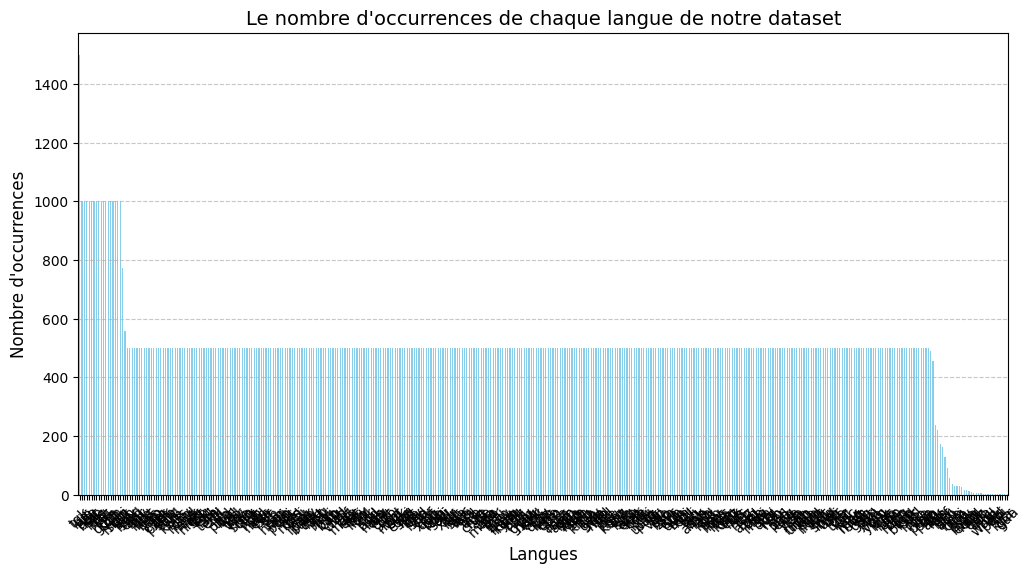

In [2]:
import matplotlib.pyplot as plt

# Charger les données
train_df = pd.read_csv("train_submission.csv")

# Compter le nombre d'occurrences de chaque langue
language_counts = train_df["Label"].value_counts()

# Tracer le graphique
plt.figure(figsize=(12, 6))
language_counts.head(389).plot(kind="bar", color="skyblue")  
plt.title("Le nombre d'occurrences de chaque langue de notre dataset", fontsize=14)
plt.xlabel("Langues", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphe
plt.show()


In [3]:
# 1. Vérifier les valeurs manquantes
print("Valeurs manquantes :\n", train_df.isnull().sum())

Valeurs manquantes :
 Usage      0
Text       0
Label    500
dtype: int64


In [4]:
# Vérifier les lignes sans label (valeurs manquantes dans la colonne 'Label')
missing_labels = train_df["Label"].isnull().sum()

# Calculer le pourcentage de lignes sans label
total_rows = train_df.shape[0]
missing_labels_percentage = (missing_labels / total_rows) * 100

# Afficher le résultat
print(f"Nombre de lignes sans label : {missing_labels}")
print(f"Pourcentage de lignes sans label : {missing_labels_percentage:.2f}%")

Nombre de lignes sans label : 500
Pourcentage de lignes sans label : 0.26%


On a 500 lignes manquantes et cela représente 0.26% de notre dataset globale.

In [5]:
# 2. Vérifier le nombre d'exemples par langue
print("\nTop 10 des langues les plus fréquentes :\n", train_df["Label"].value_counts().head(10))



Top 10 des langues les plus fréquentes :
 Label
tgk    1500
kur    1000
hin    1000
aze    1000
bak    1000
kat    1000
srp    1000
hbs    1000
uig    1000
hau    1000
Name: count, dtype: int64


In [6]:
# 3. Vérifier la longueur des textes
train_df["text_length"] = train_df["Text"].apply(len)
print("\nStatistiques sur la longueur des textes :\n", train_df["text_length"].describe())



Statistiques sur la longueur des textes :
 count    190599.000000
mean        149.974339
std         376.791972
min           5.000000
25%          64.000000
50%         104.000000
75%         172.000000
max       78939.000000
Name: text_length, dtype: float64


In [7]:
# 4. Aperçu des textes les plus courts et les plus longs
print("\nTexte le plus court :", train_df.loc[train_df["text_length"].idxmin(), "Text"])
print("\nTexte le plus long :", train_df.loc[train_df["text_length"].idxmax(), "Text"])


Texte le plus court : 唐之杜志恩

Texte le plus long : (A. C. 379.) Indictione VII  Ausonio et Olybrio coss. Theodosius Hispanus Italicae divi Trajani civitatis  a Gratiano Augusto apud Sirmium XXXIX post Valentis interitum imperator creatus est  XIV kalendas Februarias  Orientalem dumtaxat rempublicam recturus  vir admodum religiosus et catholicae Ecclesiae propagator  omnibusque Orientalibus principibus praeponendus  nisi quod Marcianum  tertium post se principem  imitatorem habuerit. Alanos  Hunos  Gothos  gentes Scythicas magnis multisque praeliis vicit.    (A. C. 380.) Ind. VIII  Gratiano Aug. V et Theodosio Aug. coss. Gregorius Nazianzenus facundissimus Christi sacerdos  et Hieronymi nostri praeceptor  ecclesia nostra apud Byzantium capta ab Arianis  plebem catholicam in beatae Anastasiae oratorio catholica quotidie allocutione continuit. Saepe namque pravorum conviciis insectatus est: sed gratia Christi praeditus  usque ad id tempus quo eadem ecclesia sui praesentia nostris est redd

In [8]:

# Afficher des informations générales sur le DataFrame, y compris les types de données
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190599 entries, 0 to 190598
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Usage        190599 non-null  object
 1   Text         190599 non-null  object
 2   Label        190099 non-null  object
 3   text_length  190599 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.8+ MB


In [9]:
train_df["Label"] = train_df["Label"].astype("string")

# Vérifier les types après conversion
print(train_df.dtypes)

Usage                  object
Text                   object
Label          string[python]
text_length             int64
dtype: object


The project as was presented to us, is defined as a classification problem where the goal is to classify received texts in onne of the many languages that was presented. This classificatio problem will need a multiclass classifier to be resolved. As we are given the labels of instances we consider this a supervised classification model: 

Training data: Set of labelled instances 
Target values: Desired output signals 
Predictive model: Can predict the target value of new data
New data: Data that is not in the training set

Our work will consist in the categorization of instances whose goal is to predict categorical target values

We consider that the data that we have is structured, making it easier to work with.

We have found that some data is not labeled, however consider the small value that it is compared to the dataset we chose to ignore them and apply the listwise deletion to deal with it and not to impute or replace the missing label by any other value.

For the labels, we consider them to be a categorical value and use one hot encoding to convert them into numerical values.

In [10]:

# Afficher des informations générales sur le DataFrame, y compris les types de données
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190599 entries, 0 to 190598
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Usage        190599 non-null  object
 1   Text         190599 non-null  object
 2   Label        190099 non-null  string
 3   text_length  190599 non-null  int64 
dtypes: int64(1), object(2), string(1)
memory usage: 5.8+ MB


In [11]:
# Créer une copie du DataFrame pour éviter de modifier l'original
train_df_cleaned = train_df.copy()

# Supprimer les lignes avec des labels manquants dans la copie
train_df_cleaned = train_df_cleaned.dropna(subset=["Label"])

# Vérifier la forme du DataFrame après suppression
print(f"Nombre de lignes après suppression des lignes sans label : {train_df_cleaned.shape[0]}")

Nombre de lignes après suppression des lignes sans label : 190099


In [12]:
# Sauvegarder le DataFrame nettoyé dans un fichier CSV
train_df_cleaned.to_csv("train_cleaned.csv", index=False)

print("Le fichier CSV nettoyé a été sauvegardé sous le nom 'train_cleaned.csv'.")

Le fichier CSV nettoyé a été sauvegardé sous le nom 'train_cleaned.csv'.


In [13]:
# Créer un dictionnaire de mappage des labels vers des valeurs numériques
label_mapping = {label: idx+1 for idx, label in enumerate(train_df_cleaned['Label'].unique())}

# Appliquer ce mappage sur la colonne 'Label' pour la convertir en valeurs numériques
train_df_cleaned['Label'] = train_df_cleaned['Label'].map(label_mapping)

# Afficher les premières lignes du DataFrame après transformation des labels en valeurs numériques
print(train_df_cleaned.head())

# Sauvegarder le DataFrame avec les labels numériques dans un fichier CSV
train_df_cleaned.to_csv("train_cleaned_numeric_labels.csv", index=False)

print("Le fichier CSV avec les labels numériques a été sauvegardé sous le nom 'train_cleaned_numeric_labels.csv'.")


    Usage                                               Text  Label  \
0  Public  َ قَالَ النَّبِيُّ ص إِنِّي أَتَعَجَّبُ مِمَّن...      1   
1  Public  Filmen forteller historien om Will Hunting  en...      2   
2  Public  An Arthrostylidium berryi in uska species han ...      3   
3  Public  Kancunarí enemigosniyquichejta munacuychej  al...      4   
4  Public  Warmeqa ama yachachichunchu hermanospa tantaku...      4   

   text_length  
0          924  
1          249  
2           84  
3          292  
4          137  
Le fichier CSV avec les labels numériques a été sauvegardé sous le nom 'train_cleaned_numeric_labels.csv'.
